In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from urllib.parse import urlparse
from sklearn import preprocessing
import tldextract
%matplotlib inline
import random
import gc
import os
import random
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SpatialDropout1D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [3]:
df=pd.read_csv("/content/mal_1.csv")
df2=pd.read_csv("/content/mal_2.csv")
df3=pd.read_csv("/content/mal_3.csv")

In [4]:
df['type']=df['type'].replace({'phishing':1,'benign':0,'defacement':1,'malware':1})

In [5]:
df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df2.drop('label',axis = 1, inplace = True)
df2=df2.rename(columns={'result': 'type'})

In [6]:
df3=df3.rename(columns={'label': 'type'})
df3['type']=df3['type'].replace({'bad':1,'good':0})

In [7]:
df=df.append(df2)
df=df.append(df3)

In [8]:
df.drop_duplicates(keep='first',inplace=True)

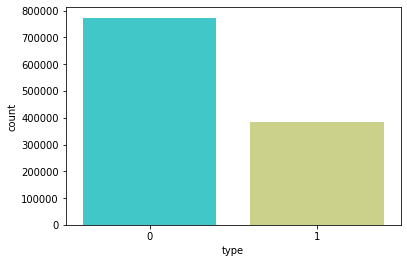

In [9]:
sns.countplot(x='type',data=df, palette='rainbow')
plt.show()

In [10]:
#Feature Extraction methods

#returns the length of the url
def http(s):
    return s.count('http')

#returns the count of http in the url
def https(s):
    return s.count('https')

#returns the count of www in the url
def www(s):
    return s.count('www')

#returns the count of digits in the url
def digit(s):
    return sum(i.isnumeric() for i in s)

#returns the count of alphabets in the url
def alpha(s):
    return sum(i.isalpha() for i in s)

#returns the count of special character's in the url
def spec_char(s):
    return sum((not(i.isalpha()) and not(i.isnumeric())) for i in s)

#returns the count of / in the url
def spec_char_1(s):
    return s.count('/')

#returns the count of ! in the url
def spec_char_2(s):
    return s.count('!')

#returns the count of . in the url
def spec_char_3(s):
    return s.count('.')

#returns the count of @ in the url    
def spec_char_4(s):
    return s.count('@')

#returns the count of % in the url
def spec_char_5(s):
    return s.count('%')

#returns the count of ? in the url
def spec_char_6(s):
    return s.count('?')

#returns the count of = in the url
def spec_char_7(s):
    return s.count('=')

#returns the count of + in the url
def spec_char_8(s):
    return s.count('+')

#returns the count of - in the url
def spec_char_9(s):
    return s.count('-')

#returns the count of & in the url
def spec_char_10(s):
    return s.count('&')

def query_length(s):
    return len(urlparse(s).query)

#returns the domain of the url
def dom_suffix(s):
    domains={'com':1,'edu':2,'org':3,'net':4,'onion':5,'in':6}
    s=tldextract.extract(s).suffix
    if s in domains.keys():
        return domains[s]
    else:
        return 0

#returns the length of the domain
def dom_length(s):
    return len(tldextract.extract(s).domain)


#returns the length of the sub_domain
def subdom_length(s):
    return len(tldextract.extract(s).subdomain)

#returns the length of the url path
def path_length(s):
    return len(urlparse(s).path)

#returns 1 if url contains a query
def has_query(s):
    if len(urlparse(s).query)==0:
        return 0
    else:
        return 1
#Checks for ipv4 in the url
def ip(s):
    has_ip=re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
    '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
    '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
    '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', s)
    if has_ip:
        return 1
    else:
        return 0

#.php .EXE .html .htm .txt .avi .jar .js
def extension(s):
    #domains={'.htm':1,'.html':2,'.js':3,'.css':4,'.exe':5,}
    if '.htm' in s:
        return 1
    elif '.html' in s:
        return 2
    elif '.js' in s:
        return 3
    elif '.css' in s:
        return 4
    elif '.exe' in s:
        return 5
    elif '.php' in s:
        return 6
    elif '.py' in s:
        return 7
    else:
        return 0

In [11]:
#Extracting the feautures

df['len']=df['url'].apply(lambda s : len(str(s)))

df['http_count']=df['url'].apply(lambda s : http(s))

df['https_count']=df['url'].apply(lambda s : https(s))

df['www']=df['url'].apply(lambda s : www(s))

df['digit_count']=df['url'].apply(lambda s: digit(s))

df['alpha_count']=df['url'].apply(lambda s: alpha(s))

df['spec_char_count']=df['url'].apply(lambda s: spec_char(s))

df['/']=df['url'].apply(lambda s: spec_char_1(s))

df['!']=df['url'].apply(lambda s: spec_char_2(s))

df['.']=df['url'].apply(lambda s: spec_char_3(s))

df['@']=df['url'].apply(lambda s: spec_char_4(s))

df['%']=df['url'].apply(lambda s: spec_char_5(s))

df['?']=df['url'].apply(lambda s: spec_char_6(s))

df['=']=df['url'].apply(lambda s: spec_char_7(s))

df['+']=df['url'].apply(lambda s: spec_char_8(s))

df['-']=df['url'].apply(lambda s: spec_char_9(s))

df['dom_suffix']=df['url'].apply(lambda s: dom_suffix(s))

df['dom_length']=df['url'].apply(lambda s: dom_length(s))

df['subdom_length']=df['url'].apply(lambda s: subdom_length(s))

df['query']=df['url'].apply(lambda s: has_query(s))

df['extension']=df['url'].apply(lambda s: extension(s))

df['ip']=df['url'].apply(lambda s: ip(s))

df.drop('url',axis = 1, inplace = True)

In [12]:
df = shuffle(df)

In [13]:
df.head()

,type,len,http_count,https_count,www,digit_count,alpha_count,spec_char_count,/,!,.,@,%,?,=,+,-,dom_suffix,dom_length,subdom_length,query,extension,ip
407922,1,25,1,0,1,0,18,7,3,0,2,0,0,0,0,0,1,1,9,3,0,0,0
2341,1,57,0,0,0,25,23,9,4,0,3,1,0,0,0,0,0,1,10,10,0,5,0
233212,0,49,0,0,0,8,33,8,1,0,3,0,0,0,0,0,1,1,8,12,0,1,0
395720,1,55,1,0,0,0,43,12,6,0,3,0,0,1,1,0,0,0,3,0,1,6,0
104544,0,86,1,1,1,1,76,9,5,0,3,0,0,0,0,0,0,1,12,3,0,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156638 entries, 407922 to 93251
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype
---  ------           --------------    -----
 0   type             1156638 non-null  int64
 1   len              1156638 non-null  int64
 2   http_count       1156638 non-null  int64
 3   https_count      1156638 non-null  int64
 4   www              1156638 non-null  int64
 5   digit_count      1156638 non-null  int64
 6   alpha_count      1156638 non-null  int64
 7   spec_char_count  1156638 non-null  int64
 8   /                1156638 non-null  int64
 9   !                1156638 non-null  int64
 10  .                1156638 non-null  int64
 11  @                1156638 non-null  int64
 12  %                1156638 non-null  int64
 13  ?                1156638 non-null  int64
 14  =                1156638 non-null  int64
 15  +                1156638 non-null  int64
 16  -                1156638 non-null  int64
 17  dom_s

In [15]:
x=['len','http_count','https_count','www','digit_count','alpha_count','spec_char_count','/','!','.','@','%','?','=','+','-','dom_suffix','dom_length','subdom_length','query','extension','ip']
min_max_scaler = preprocessing.MinMaxScaler()
column_names_to_normalize = x
x = df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df[column_names_to_normalize] = df_temp

In [16]:
x=df[['len','http_count','https_count','www','digit_count','alpha_count','spec_char_count','/','!','.','@','%','?','=','+','-','dom_suffix','dom_length','subdom_length','query','extension','ip']]
y=df['type']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle='True',stratify=y)

In [18]:
#Callbacks
es = EarlyStopping(monitor='val_loss', 
        mode='min', 
        patience=3,
        restore_best_weights=True, 
        verbose=1)
mc = ModelCheckpoint('best_model.h5',verbose=1,save_best_only=True, save_weights_only = True)
reduce_lr=ReduceLROnPlateau( monitor="val_loss",factor=0.5,patience=1, verbose=1)

In [19]:
#neural network
nn=Sequential()
nn.add(keras.Input(shape=(22,)))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(16, activation='relu'))
nn.add(Dense(8, activation='relu'))
nn.add(Dense(4, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

In [20]:
nn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
nn.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test), callbacks=[es,mc,reduce_lr],batch_size=128)

Epoch 1/100
7229/7229 [==============================] - 35s 4ms/step - loss: 0.2264 - accuracy: 0.9183 - val_loss: 0.1773 - val_accuracy: 0.9315

Epoch 00001: val_loss improved from inf to 0.17729, saving model to best_model.h5
Epoch 2/100
7229/7229 [==============================] - 32s 4ms/step - loss: 0.1660 - accuracy: 0.9354 - val_loss: 0.1583 - val_accuracy: 0.9370

Epoch 00002: val_loss improved from 0.17729 to 0.15826, saving model to best_model.h5
Epoch 3/100
7229/7229 [==============================] - 30s 4ms/step - loss: 0.1494 - accuracy: 0.9411 - val_loss: 0.1485 - val_accuracy: 0.9412

Epoch 00003: val_loss improved from 0.15826 to 0.14846, saving model to best_model.h5
Epoch 4/100
7229/7229 [==============================] - 31s 4ms/step - loss: 0.1421 - accuracy: 0.9439 - val_loss: 0.1371 - val_accuracy: 0.9461

Epoch 00004: val_loss improved from 0.14846 to 0.13714, saving model to best_model.h5
Epoch 5/100
7229/7229 [==============================] - 30s 4ms/step - 

In [26]:
print(nn.evaluate(x_train, y_train))

28916/28916 [==============================] - 69s 2ms/step - loss: 0.1072 - accuracy: 0.9580
[0.107231505215168, 0.9580345749855042]


In [ ]:
# #Model Builder Function
# def create_nn(layers,activation):
#   nn=Sequential()
#   nn.add(keras.Input(shape=(22,)))
#   for i,nodes in enumerate(layers):
#       nn.add(Dense(nodes,activation=activation))
#   nn.add(Dense(1, activation='sigmoid'))
#   nn.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
#   return nn
# nn=KerasClassifier(build_fn=create_nn,verbose=1)

In [ ]:
# layers=[[128,256],[128,64,32],[64,32,16,8],[32,8],[8,4]]
# activations=['relu']
# param_grid=dict(layers=layers,activation=activations,batch_size=[256],epochs=[30])
# grid=GridSearchCV(estimator=nn,param_grid=param_grid)

In [ ]:
# best_model=grid.fit(x_train,y_train,validation_data=(x_test, y_test),callbacks=[es,mc,reduce_lr])

In [ ]:
# best_model.best_score_,grid_result.best_params_